In [28]:
%matplotlib inline

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression

# Linear and Logistic Regression

In [9]:
dataset = fetch_california_housing()

In [12]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [15]:
dataset.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [13]:
df = fetch_california_housing(as_frame = True)

In [16]:
house_prices = df.frame

In [17]:
house_prices

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


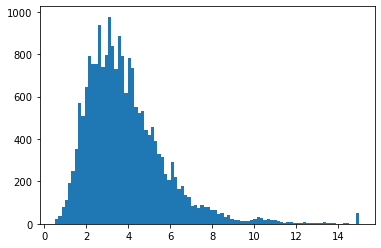

In [19]:
plt.hist(house_prices.MedInc, bins = "fd")
plt.show()

In [21]:
house_prices[house_prices.MedInc > 14].sort_values("MedInc")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
5304,14.2867,49.0,7.603774,0.946541,850.0,2.672956,34.07,-118.46,5.00001
15698,14.2959,52.0,8.172727,0.872727,304.0,2.763636,37.79,-122.46,5.00001
9811,14.4113,28.0,11.634686,1.509225,569.0,2.099631,36.57,-121.94,5.00001
16915,14.4219,52.0,8.253731,0.950249,519.0,2.582090,37.56,-122.35,5.00001
9370,14.5833,24.0,5.613333,0.853333,163.0,2.173333,37.92,-122.52,5.00001
10483,14.9009,8.0,9.860169,1.114407,899.0,3.809322,33.59,-117.68,5.00001
18052,15.0000,19.0,7.626263,0.939394,267.0,2.696970,37.25,-121.98,5.00001
5260,15.0000,39.0,9.293750,1.018750,414.0,2.587500,34.05,-118.50,5.00001
8853,15.0001,52.0,9.867036,1.091413,1163.0,3.221607,34.07,-118.41,5.00001
8854,15.0001,52.0,8.710145,1.028986,408.0,2.956522,34.07,-118.41,5.00001


Имаме ли повторения?

In [22]:
house_prices.drop_duplicates().shape

(20640, 9)

Не, спрямо всичките данни нямаме повторения.

In [23]:
house_prices.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


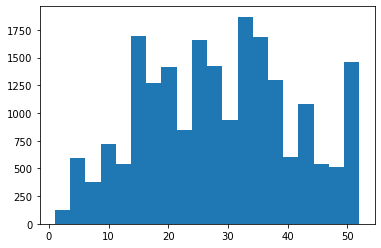

In [27]:
plt.hist(house_prices.HouseAge, bins = 20)
plt.show()

In [26]:
house_prices.HouseAge.value_counts()

52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: HouseAge, dtype: int64

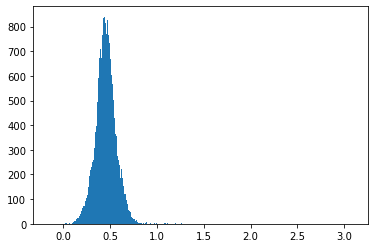

In [32]:
plt.hist(np.log10(house_prices.AveOccup), bins = "fd")
plt.show()

In [35]:
house_prices[np.log10(house_prices.AveOccup) > 1.5].sort_values("AveOccup")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29,1.62500
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500


Това са outliers. С feature engineering може да се стигне далеч. Наивният модел би бил директен.

In [37]:
house_model = LinearRegression()

In [40]:
house_model

LinearRegression()

Много срещана грешка:

In [41]:
house_model.fit(house_prices, house_prices.MedHouseVal)

LinearRegression()

In [42]:
house_model.coef_

array([-3.46384502e-15, -4.69069228e-15, -1.70002901e-15,  4.39362088e-15,
        1.38777878e-17, -1.04083409e-16, -1.10154941e-16, -5.39390581e-16,
        1.00000000e+00])

In [43]:
house_model.feature_names_in_

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'], dtype=object)

Кой feature какъв коефициент има:

In [44]:
list(zip(house_model.feature_names_in_, house_model.coef_))

[('MedInc', -3.4638450153562557e-15),
 ('HouseAge', -4.690692279041286e-15),
 ('AveRooms', -1.700029006457271e-15),
 ('AveBedrms', 4.393620883780258e-15),
 ('Population', 1.3877787807814457e-17),
 ('AveOccup', -1.0408340855860843e-16),
 ('Latitude', -1.1015494072452725e-16),
 ('Longitude', -5.393905808115385e-16),
 ('MedHouseVal', 1.0000000000000016)]

Първа много често срещана грешка е оставям изходен фиичър или който е много подобен на него на който няма да получа в реалните данни като част от модела.

-1.700029006457271e-15 ... това са коефициенти много близки до 0. На практика те са 0. Това са числени грешки 10 -15 , 10 - 16

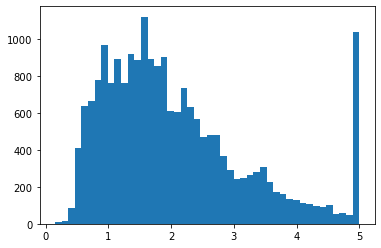

In [65]:
plt.hist(house_prices.MedHouseVal, bins = "fd")
plt.show()

In [46]:
house_model = LinearRegression()

In [47]:
house_attributes = house_prices.drop(columns = ["MedHouseVal"])
house_values = house_prices.MedHouseVal

In [48]:
house_model.fit(house_attributes, house_values)

LinearRegression()

In [49]:
house_model.coef_

array([ 4.36693293e-01,  9.43577803e-03, -1.07322041e-01,  6.45065694e-01,
       -3.97638942e-06, -3.78654265e-03, -4.21314378e-01, -4.34513755e-01])

In [50]:
list(zip(house_model.feature_names_in_, house_model.coef_))

[('MedInc', 0.436693293134325),
 ('HouseAge', 0.00943577803323845),
 ('AveRooms', -0.10732204139090426),
 ('AveBedrms', 0.6450656935198124),
 ('Population', -3.976389421180351e-06),
 ('AveOccup', -0.0037865426549710595),
 ('Latitude', -0.421314377527144),
 ('Longitude', -0.43451375467477726)]

Тези коефициенти са около 1цата и около 0та, което е хубаво.

In [55]:
scaler = MinMaxScaler()

In [56]:
scaler.fit(house_prices)

MinMaxScaler()

In [57]:
scaler.transform(house_prices)

array([[0.53966842, 0.78431373, 0.0435123 , ..., 0.5674814 , 0.21115538,
        0.90226638],
       [0.53802706, 0.39215686, 0.03822395, ..., 0.565356  , 0.21215139,
        0.70824656],
       [0.46602805, 1.        , 0.05275646, ..., 0.5642933 , 0.21015936,
        0.69505074],
       ...,
       [0.08276438, 0.31372549, 0.03090386, ..., 0.73219979, 0.31175299,
        0.15938285],
       [0.09429525, 0.33333333, 0.03178269, ..., 0.73219979, 0.30179283,
        0.14371281],
       [0.13025338, 0.29411765, 0.03125246, ..., 0.72582359, 0.30976096,
        0.15340349]])

Най-често се стремим експонентата да бъде 10 на 0лева, т.е. да бъдат стойности, които са от порядъка на 1ци.

In [58]:
house_prices.min(axis = 0)

MedInc           0.499900
HouseAge         1.000000
AveRooms         0.846154
AveBedrms        0.333333
Population       3.000000
AveOccup         0.692308
Latitude        32.540000
Longitude     -124.350000
MedHouseVal      0.149990
dtype: float64

In [59]:
house_prices.max(axis = 0)

MedInc            15.000100
HouseAge          52.000000
AveRooms         141.909091
AveBedrms         34.066667
Population     35682.000000
AveOccup        1243.333333
Latitude          41.950000
Longitude       -114.310000
MedHouseVal        5.000010
dtype: float64

In [62]:
house_attributes_scaled = scaler.fit_transform(house_attributes)

In [63]:
house_model_scaled = LinearRegression()

In [ ]:
house_model_scaled.fit(house_attributes_scaled, house_prices)